In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
df = pd.read_csv(r'C:\Users\Chivon\Documents\Kaggle\acs2015_census_tract_data.csv')

A little Exploratory Data Analysis

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3048 entries, 0 to 3047
Data columns (total 42 columns):
County             3048 non-null object
State              3048 non-null object
CensusTract        3048 non-null object
Hispanic           3048 non-null object
White              3048 non-null object
Black              3048 non-null object
Native             3048 non-null object
Asian              3048 non-null object
Pacific            3048 non-null object
Citizen            3048 non-null object
Income             3048 non-null object
IncomeErr          3048 non-null object
IncomePerCap       3048 non-null object
IncomePerCapErr    3048 non-null object
Poverty            3048 non-null object
ChildPoverty       3048 non-null object
Professional       3048 non-null object
Service            3048 non-null object
Office             3048 non-null object
Construction       3048 non-null object
Production         3048 non-null object
Drive              3048 non-null object
Carpool      

In [144]:
a = df.groupby('County').sum()
Total_pop = a['TotalPop']
Men = a['Men']
Women = a['Women']

In [145]:
df_by_county = df.groupby(['County','State']).mean()


DataError: No numeric types to aggregate

In [ ]:
df_by_county.reset_index().columns

In [ ]:
df_by_county.drop(['TotalPop','Men','Women'], axis=1, inplace = True)

In [ ]:
df_by_county['TotalPop'] = Total_pop
df_by_county['Men'] = Men
df_by_county['Women'] = Women
df_by_county.reset_index(inplace=True)

In [ ]:
lat_longs = pd.read_csv(r'c:\Users\Chivon\Documents\Kaggle\zip_codes_states.csv')

In [ ]:
lat_long_avgs = lat_longs.groupby('county').mean()
lat_long_avgs.reset_index(inplace = True)

In [146]:
df = df_by_county.merge(lat_long_avgs,left_on = 'County',right_on = 'county')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3048 entries, 0 to 3047
Data columns (total 41 columns):
County             3048 non-null object
State              3048 non-null object
CensusTract        3048 non-null float64
Hispanic           3048 non-null float64
White              3048 non-null float64
Black              3048 non-null float64
Native             3048 non-null float64
Asian              3048 non-null float64
Pacific            3048 non-null float64
Citizen            3048 non-null float64
Income             3047 non-null float64
IncomeErr          3047 non-null float64
IncomePerCap       3048 non-null float64
IncomePerCapErr    3048 non-null float64
Poverty            3048 non-null float64
ChildPoverty       3048 non-null float64
Professional       3048 non-null float64
Service            3048 non-null float64
Office             3048 non-null float64
Construction       3048 non-null float64
Production         3048 non-null float64
Drive              3048 non-null f

In [148]:
df.describe()

,CensusTract,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,...,PublicWork,SelfEmployed,FamilyWork,Unemployment,TotalPop,Men,Women,zip_code,latitude,longitude
count,3.048000e+03,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3047.000000,3047.000000,...,3048.000000,3048.000000,3048.000000,3048.000000,0.0,0.0,0.0,3048.000000,3048.000000,3048.000000
mean,3.129498e+10,10.568496,76.445592,8.558752,1.450629,1.100974,0.070894,2908.270410,46573.496742,7148.517836,...,17.373742,8.143941,0.298070,8.175520,NaN,NaN,NaN,51099.198283,38.022977,-91.021306
std,1.591584e+10,18.409663,22.078517,14.207588,5.868401,2.322197,0.382191,859.119026,12941.586577,2412.409428,...,6.265487,3.983519,0.448437,4.065882,NaN,NaN,NaN,21445.728008,5.040057,11.202721
min,1.001021e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,10931.166667,1883.000000,...,5.862500,0.000000,0.000000,0.000000,NaN,NaN,NaN,601.000000,17.967510,-164.860031
25%,1.905057e+10,1.833333,65.100000,0.500000,0.106795,0.200000,0.000000,2369.333333,38455.038760,5595.333333,...,13.064583,5.462933,0.091256,5.600000,NaN,NaN,NaN,36781.376543,35.635930,-96.886176
50%,3.002400e+10,3.796667,84.500000,1.800000,0.257519,0.500000,0.000000,2930.142857,45114.000000,6901.500000,...,16.130952,7.017143,0.180000,7.733333,NaN,NaN,NaN,51002.871795,38.459049,-89.482088
75%,4.605646e+10,9.622778,93.600000,9.506250,0.600000,1.068444,0.050000,3424.125000,52601.166667,8303.000880,...,20.150000,9.720000,0.354545,10.100000,NaN,NaN,NaN,67133.440000,40.818504,-83.967415
max,7.215375e+10,99.940000,99.800000,88.450000,80.600000,40.846383,10.812121,7987.400000,123499.718750,22454.000000,...,60.950000,36.600000,9.800000,36.400000,NaN,NaN,NaN,99402.000000,49.851907,-65.296467


In [149]:
df.head()

,County,State,CensusTract,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,SelfEmployed,FamilyWork,Unemployment,TotalPop,Men,Women,county,zip_code,latitude,longitude
0,Abbeville,South Carolina,4.500195e+10,1.250000,69.966667,26.550000,0.150000,0.000000,0.000000,3233.166667,...,6.400000,0.000000,10.566667,NaN,NaN,NaN,Abbeville,29636.800000,34.257192,-82.467176
1,Acadia,Louisiana,2.200196e+10,2.016667,77.466667,17.691667,0.175000,0.166667,0.200000,3738.416667,...,6.533333,0.000000,9.941667,NaN,NaN,NaN,Acadia,70539.272727,30.245473,-92.417196
2,Accomack,Virginia,5.100139e+10,7.550000,64.075000,26.525000,0.387500,0.212500,0.000000,2047.666667,...,7.925000,0.625000,7.025000,NaN,NaN,NaN,Accomack,23393.100000,37.792353,-75.655392
3,Ada,Idaho,1.600100e+10,7.844068,84.933898,1.155932,0.527119,2.688136,0.166102,5065.016949,...,7.244068,0.120339,6.781356,NaN,NaN,NaN,Ada,83715.547619,43.515017,-116.249349
4,Adair,Iowa,1.900196e+10,1.400000,97.300000,0.300000,0.000000,0.266667,0.000000,1926.333333,...,11.533333,0.200000,2.900000,NaN,NaN,NaN,Adair,55967.086957,38.434601,-90.920534


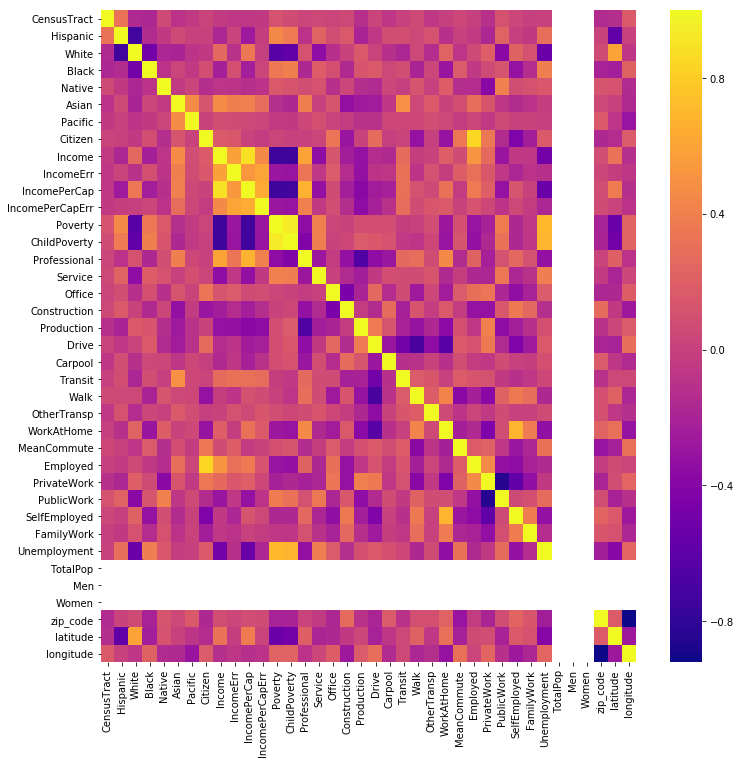

In [150]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix,cmap = 'plasma')

In [137]:
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import *

plotly.tools.set_credentials_file(username='ChivPowers', api_key='bbX0kaoHP5mH5AFGZwNg')

In [138]:
state_codes = {
    'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME', 'Puerto Rico': 'PR'}

df['state_code'] = df['State'].apply(lambda x : state_codes[x])

In [140]:

for col in df.columns:
    df[col] = df[col].astype(str)

data = [ dict(
        type='choropleth',
        autocolorscale = False,
        locations = df.state_code,
        z = df['Poverty'].astype(float),
        locationmode = 'USA-states',
        text = df['county'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]

layout = dict(
        title = '% Poverty in US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [141]:
for col in df.columns:
    df[col] = df[col].astype(str)

data = [ dict(
        type='choropleth',
        autocolorscale = False,
        locations = df.state_code,
        z = df['ChildPoverty'].astype(float),
        locationmode = 'USA-states',
        text = df['State'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]

layout = dict(
        title = '% Child Poverty in US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [142]:
for col in df.columns:
    df[col] = df[col].astype(str)

data = [ dict(
        type='choropleth',
        autocolorscale = False,
        locations = df.state_code,
        z = df['Income'].astype(float),
        locationmode = 'USA-states',
        text = df['State'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Income in US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )